# **ATP Match Data Exploration**

Our goal here is to explore the match-level ATP data from [Jeff Sackmann](https://github.com/JeffSackmann/tennis_atp). We won't be doing any cleaning, manipulation, or extended analysis. We just are getting a handle on and document what the data contain to facilitate later analysis. 

First we mount my google drive where I've saved the data we'll be using. Note that the data starts in 1968, when the men's tennis open era began. I've limited the data that I use to ATP tour-level main draw singles match-level data. There is some data for 2020 but the season has been interrupted so it might make things simpler to exclude this. The data from before 1991 has sparsely populated match statistics. This might be a limitation for some analyses as well. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


We then import the packages we'll need. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import os
import glob
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We'll start by reading in the csv files and then appending them together. 

We also create a `year` field from the `tourney_id` field to keep track of the different yearly datasets.

In [3]:
os.chdir("/content/drive/My Drive/ATP Tennis/Data/")
filenames = [i for i in glob.glob('*.{}'.format('csv')) if "atp_matches" in i]
atp_matches = pd.concat([pd.read_csv(f) for f in filenames ])

In [6]:
atp_matches["year"] = [int(i[0:4]) for i in atp_matches["tourney_id"].values]

Taking a peak at the data, we see that there are lots of features to help us identify the tournament, the round in the tournament, the result, attributes about the players, and a variety of statistics from the match like duration, number of aces, first serves made, first serve points won, break points faced and saved, etc.  Note that we also see that many of these fields might not be available for all years of data.

In [8]:
atp_matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,1970-580,Australian Open,Grass,64,G,19700119,1,100125,NaN,NaN,John Cooper,R,NaN,AUS,23.208761,109775,NaN,NaN,Robert Wilson,R,NaN,GBR,34.160164,7-Mar,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
1,1970-580,Australian Open,Grass,64,G,19700119,2,100070,NaN,NaN,Jan Kukal,R,NaN,CZE,27.351129,106562,NaN,NaN,Anthony Hammond,R,NaN,AUS,NaN,6-4 12-10,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
2,1970-580,Australian Open,Grass,64,G,19700119,3,109798,NaN,NaN,Lenny Schloss,R,NaN,USA,NaN,109799,NaN,NaN,Geoff Pollard,R,NaN,AUS,36.002738,7-5 6-4,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
3,1970-580,Australian Open,Grass,64,G,19700119,4,109800,NaN,NaN,Mathias Werren,R,NaN,SUI,25.697467,100017,NaN,NaN,Mal Anderson,R,NaN,AUS,34.882957,W/O,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970
4,1970-580,Australian Open,Grass,64,G,19700119,5,109801,NaN,NaN,Ken Stuart,R,NaN,USA,NaN,100234,NaN,NaN,Allan McDonald,R,NaN,AUS,18.888433,7-5 6-4,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970


We see that there are 176,951 matches and 50 variables in total, including `year` that we just added. Note that each row in the data represents a match. So there is information about both the match winner and loser on the same row. 

In [10]:
atp_matches.shape

(176951, 50)

**Explore High-Level Features**

Let's explore some of these fields. We start by looking at the unique values in `tourney_name`, `surface`, `draw_size`, `tourney_level`, `best_of`, `round`, and `year`. These give us a handle on whether we're seeing the high-level information we expect. 

Tournament names look like what we'd expect. It's interesting to note that the Davis Cup matches are broken out by the round and countries matched up in the round. So these matches take up most of the unique values. Note that we don't see any missing values but we do see some names that might need to be cleaned, if we decide this is a useful field to use. 

In [24]:
Counter(atp_matches["tourney_name"].isnull())

Counter({False: 176951})

In [21]:
dict(Counter(atp_matches[atp_matches["tourney_level"] != "D"]["tourney_name"])).items()

dict_items([('Australian Open', 5415), ('Philadelphia WCT', 497), ('Monte Carlo', 718), ('Roland Garros', 6556), ('Rome', 1419), ('St. Louis WCT', 142), ('Casablanca WCT', 14), ("Queen's Club", 2656), ('Wimbledon', 6604), ('Dusseldorf', 1115), ('Bastad', 1557), ('Gstaad', 1588), ('Washington', 2656), ('Cincinnati', 1270), ('Indianapolis', 2249), ('Hilversum', 845), ('Louisville', 456), ('Boston', 1205), ('Montreal / Toronto', 866), ('Hamburg', 1640), ('South Orange', 475), ('US Open', 6553), ('Los Angeles', 1753), ('Berkeley', 126), ('Barcelona', 2987), ('Phoenix', 30), ('Stockholm Open', 109), ('Buenos Aires', 1300), ('Paris Indoor', 566), ('Masters', 264), ('Johannesburg', 1021), ('Salisbury', 358), ('Sydney', 777), ('Wembley', 573), ('Durban', 176), ('Munich', 1511), ('Bristol', 454), ('Bournemouth', 639), ('Nottingham', 862), ('Dallas', 76), ('Houston', 905), ('Brussels', 635), ('Atlanta', 780), ('Las Vegas', 549), ('Charlotte', 204), ('Fort Worth', 40), ('Hampton', 239), ('Miami',

In [22]:
dict(Counter(atp_matches[atp_matches["tourney_level"] == "D"]["tourney_name"])).items()

dict_items([('Davis Cup G2 QF: HKG vs JPN', 8), ('Davis Cup G2 SF: MAS vs SRI', 2), ('Davis Cup SAM QF: ARG vs CHI', 2), ('Davis Cup SAM QF: VEN vs BRA', 4), ('Davis Cup EUR SF: IND vs PAK', 6), ('Davis Cup G1 QF: VIE vs INA', 2), ('Davis Cup WG SF: PHI vs AUS', 4), ('Davis Cup SAM QF: COL vs ECU', 4), ('Davis Cup SAM SF: BRA vs CHI', 4), ('Davis Cup WG SF: JPN vs VIE', 4), ('Davis Cup SAM SF: COL vs URU', 4), ('Davis Cup AME F: JPN vs AUS', 12), ('Davis Cup WG F: IND vs SRI', 8), ('Davis Cup EUR R1: LUX vs IRL', 2), ('Davis Cup EUR R1: POR vs MON', 4), ('Davis Cup WG F: IND vs AUS', 15), ('Davis Cup EUR R1: GBR vs AUT', 4), ('Davis Cup EUR R1: IRI vs ROU', 4), ('Davis Cup EUR R1: ITA vs TCH', 4), ('Davis Cup EUR R1: YUG vs POL', 4), ('Davis Cup AME SF: MEX vs NZL', 4), ('Davis Cup EUR R1: EGY vs NOR', 3), ('Davis Cup EUR R1: FRG vs DEN', 4), ('Davis Cup EUR R1: GRE vs NED', 4), ('Davis Cup EUR R1: HUN vs URS', 4), ('Davis Cup EUR R1: SUI vs FRA', 4), ('Davis Cup EUR R1: SWE vs ESP', 4

In [11]:
print("Number of Tournaments: ", \
      len([i for i in Counter(atp_matches[atp_matches["tourney_level"] != "D"]["tourney_name"])]) + 1)

Number of Tournaments:  444


Surface looks like what we want. Note how many more hard court and clay matches there are than grass court matches. Also it's interesting to see 'Carpet' as a category. The use of this surface ended in 2009. So we might want to remove it from our data, depending on what we're interested in.  We also see some missing values. We can see the rise of hard court matches and the decline of clay. Grass has always been less common. 

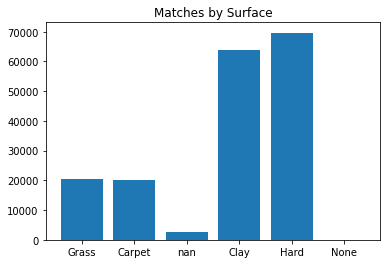

In [25]:
x = Counter(atp_matches["surface"])
plt.bar([str(i) for i in x.keys()], x.values())
plt.title("Matches by Surface")
plt.show()

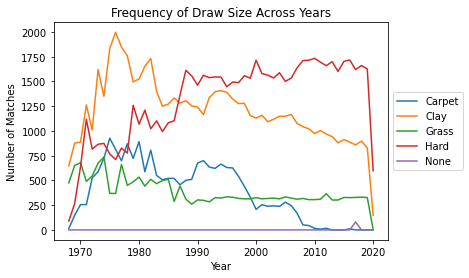

In [39]:
pd.crosstab(atp_matches["year"],atp_matches["surface"]).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Frequency of Surface Across Years")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

Draw sizes are roughly what we expect. We see that some draw sizes were popular early in the open era but have lost share, specifically size 64, while size 32 and 128 have remained common. Note that pretty much all the matches from tournaments with draw size of 4 are Davis Cup. We might consider dropping Davis Cup from analyses, but we'll have to think about this some more. Olympics are another tournament type where country is involved and thus we might want to think harder about whether these tournaments are different from others in a meaningful way for our purposes. 

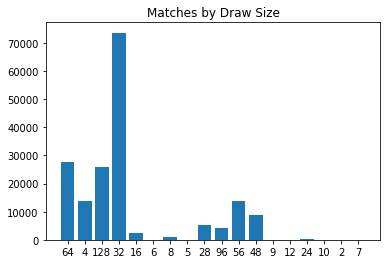

In [26]:
x = Counter(atp_matches["draw_size"])
plt.bar([str(i) for i in x.keys()], x.values())
plt.title("Matches by Draw Size")
plt.show()

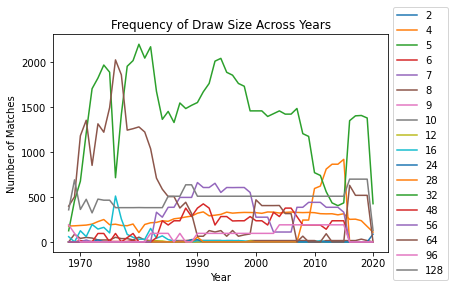

In [38]:
pd.crosstab(atp_matches["year"],atp_matches["draw_size"]).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Frequency of Draw Size Across Years")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

In [27]:
Counter(atp_matches["draw_size"])

Counter({2: 1,
         4: 13973,
         5: 5,
         6: 71,
         7: 21,
         8: 992,
         9: 44,
         10: 15,
         12: 44,
         16: 2241,
         24: 161,
         28: 5211,
         32: 73638,
         48: 8834,
         56: 13741,
         64: 27629,
         96: 4370,
         128: 25960})

In [28]:
Counter(atp_matches[atp_matches["tourney_level"] == "D"]["draw_size"])

Counter({4: 13950})

Tournament level is a coded variable. The data dictionary indicates that 

*   'A' = other tour-level events
*   'D' = Davis Cup
*   'F' = Tour finals and other season-ending events
*   'G' = Grand Slams
*   'M' = Masters 1000s
*   'C' = Challengers

This will be a convenient way to filter to tournaments that we're most interested in. (We've already made use of this above.)


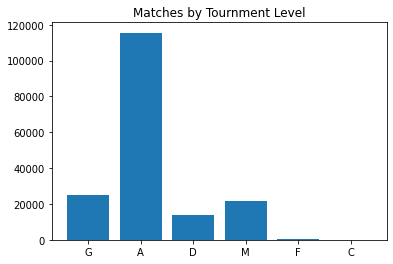

In [40]:
x = Counter(atp_matches["tourney_level"])
plt.bar([str(i) for i in x.keys()], x.values())
plt.title("Matches by Tournment Level")
plt.show()

The `best_of` feature only takes values of 3 or 5, as we'd expect. There is one match that says it was a best of 4. Looking at the rest of the tournament, we can assume this should be best of 3. Though interestingly the final for this tournament appears to legitimately been best of 5.

In [43]:
atp_matches.groupby(["best_of", "tourney_level"]).size()

best_of  tourney_level
3        A                112203
         C                   124
         D                  3665
         F                   450
         G                   398
         M                 20889
4        A                     1
5        A                  3309
         C                     1
         D                 10285
         F                    23
         G                 24854
         M                   749
dtype: int64

In [50]:
print(atp_matches[atp_matches["best_of"]==4])
print(Counter(atp_matches[atp_matches["tourney_id"]=="1972-343"]["best_of"]))
#atp_matches[atp_matches["tourney_id"]=="1972-343"]

     tourney_id tourney_name surface  ...  loser_rank loser_rank_points  year
1531   1972-343     Columbus    Hard  ...         NaN               NaN  1972

[1 rows x 50 columns]
Counter({3: 29, 4: 1, 5: 1})


Next, `round` has the matches round in the tournament (finals, semis, round robin, round of 16, etc.). As we expect there are more early round matches but most round of 32 since there are more draw sizes of 32.

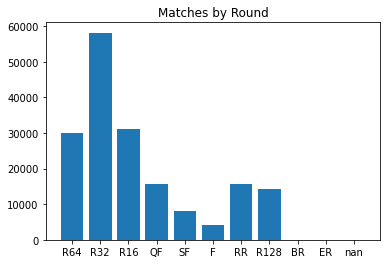

In [51]:
x = Counter(atp_matches["round"])
plt.bar([str(i) for i in x.keys()], x.values())
plt.title("Matches by Round")
plt.show()

Finally, `year` shows us that there are roughly between 2,500 and 4,000 matches each year. We see that the numbers have been falling over time, after an initial increase in the early 1970s. We see the dramatic drop in 2020 due to the partial year of data and the interrupted season.  

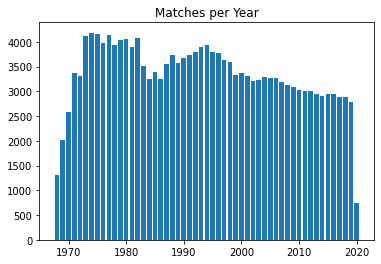

In [52]:
year = Counter(atp_matches["year"])
plt.bar(year.keys(), year.values())
plt.title("Matches per Year")
plt.show()

So we see pretty much what we expect and, notably, there are few missing values for these fields. 



**Missing Values**

But let's be a bit more systematic about checking for missing values. We count the number of matches with missing values for each of the 50 fields in the data. We see some interesting patterns. 

We again see the missing values for `surface` and `round`. 

But we also see very high numbers for `winner_seed`, `winner_entry`, `loser_seed`, and `loser_entry`. We know what the seeds are. The data dictionary tells us that the entry fields are things like 'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, and 'PR' = protected ranking. So it makes some sense that these are not populated for most of the entries. Since we also have ATP rank (which is missing far less), we'll probably be ok without these. We'll also calculate Elo ratings to assess the relative skill of the match participants, which doesn't require seed or ATP rank.

Player heights are also missing for about 30,000 matches. If we decide we need height later, we'll have to see how we might try to populate these. Depending on the pattern of these missing values there might be a chance to fill in the gaps. But we'll leave that for later. 

We see a very small number of missing ages and handedness indicators. These won't likely be a problem and we, again, might be able to repopulate these, if necessary. 

Below, we'll investigate some of the other fields with missing values more closely.

In [ ]:
#atp_matches.isnull().sum()

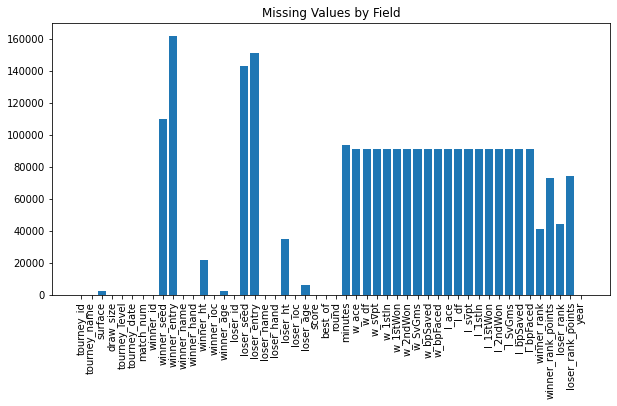

In [72]:
plt.figure(figsize=(10,5))
plt.bar(atp_matches.isnull().sum().keys(), atp_matches.isnull().sum())
plt.title("Missing Values by Field")
plt.xticks(rotation= 90)
plt.show()

There are 184 matches without scores. We dont see any obvious indication of why there is no `score` but we do have information on who won and lost. So not all is lost, unless we want to analyze specific scores.  The missing scores are generally from before 1980.

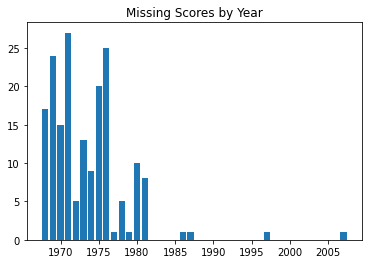

In [57]:
x = Counter(atp_matches[atp_matches["score"].isnull()]["year"])
plt.bar(x.keys(), x.values())
plt.title("Missing Scores by Year")
plt.show()

Next, we'll look into what appears to be a pattern of missing match statistics. There are 90,855 matches with missing values for all the detail performance stats (aces, first serves, break points, etc.). This is probably a systematic deficiency of some slice of the data.

We see that indeed the same 90,855 matches are missing all the detail performance stats. The read-me for the data states that "*There are some tour-level matches with missing stats. Some are missing because ATP doesn't have them. Others I've deleted because they didn't pass some sanity check (loser won 60% of points, or match time was under 20 minutes, etc). Also, Davis Cup matches are included in the tour-level files, but there are no stats for Davis Cup matches until the last few seasons.*" We also know that the pre 1991 data has very little of this information. We see that the earlier years do indeed make up most of the 90,855.

We also see that most of these are Davis Cup matches after 1991. So again, the Davis Cup data is somewhat different. 

Note that these also account for many of the missing surfaces, heights, ages, handedness, score, and many of those without player ranks. 

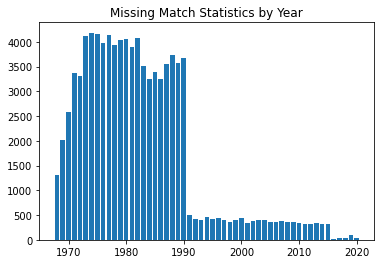

In [80]:
x = Counter(atp_matches[atp_matches["w_ace"].isnull()]["year"])
plt.bar(x.keys(), x.values())
plt.title("Missing Match Statistics by Year")
plt.show()

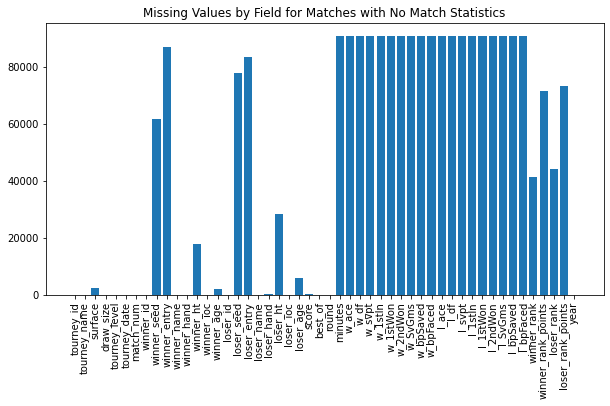

In [79]:
missing_detail_stats = atp_matches[atp_matches["w_ace"].isnull()]
plt.figure(figsize=(10,5))
plt.bar(missing_detail_stats.isnull().sum().keys(), missing_detail_stats.isnull().sum())
plt.title("Missing Values by Field for Matches with No Match Statistics")
plt.xticks(rotation= 90)
plt.show()

In [ ]:
#missing_detail_stats.isnull().sum()

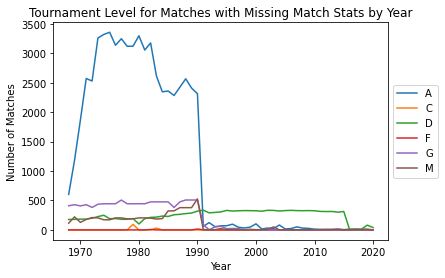

In [81]:
pd.crosstab(missing_detail_stats["year"],missing_detail_stats["tourney_level"]).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Tournament Level for Matches with Missing Match Stats by Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

When we look at the missing observations, after removing these 90,855 matches and all the Davis Cup matches, we see that many of our missing data issues are improved but that we lose all the data from before 1991. 

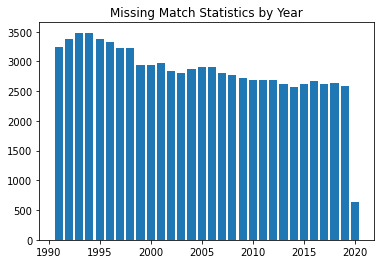

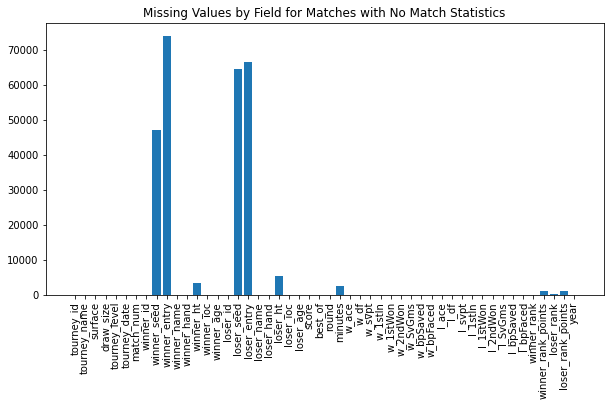

In [83]:
nonmissing_detail_stats = atp_matches[atp_matches["w_ace"].notnull()]
nonmissing_detail_stats = nonmissing_detail_stats[nonmissing_detail_stats["tourney_level"] != "D"]

x = Counter(nonmissing_detail_stats["year"])
plt.bar(x.keys(), x.values())
plt.title("Missing Match Statistics by Year")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(nonmissing_detail_stats.isnull().sum().keys(), nonmissing_detail_stats.isnull().sum())
plt.title("Missing Values by Field for Matches with No Match Statistics")
plt.xticks(rotation= 90)
plt.show()

We still need to look into the missing values in `minutes`, the rank fields, and the rank point fields. 

`minutes` tends to be missing primarily in 2015 and in years before 1990. Though there are many missings from 1990-2015. There doesn't appear to be a pattern based on tournament. The data dictionary mentions that this field is only popoulated "where available." So, while we'd like to have this information, there might not be too much we can do on this front other than exclude these matches from analyses that need match duration. 

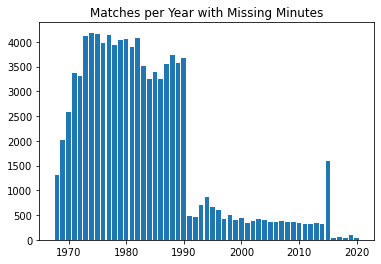

In [91]:
Counter(atp_matches[atp_matches["minutes"].isnull()]["tourney_name"])
year = Counter(atp_matches[atp_matches["minutes"].isnull()]["year"])
plt.bar(year.keys(), year.values())
plt.title("Matches per Year with Missing Minutes")
plt.show()

The rank fields are primarily missing before the early 1980s. Since there are relatively few, we may exclude these from analysis or just use alternatives like Elo rating. 

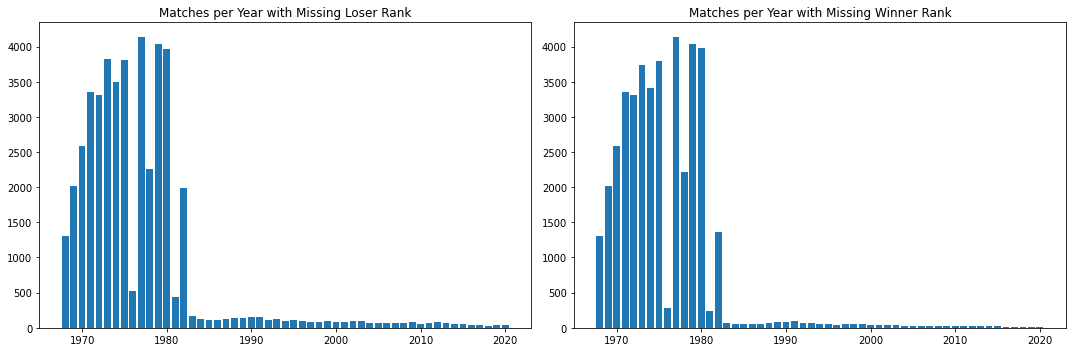

In [93]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
year = Counter(atp_matches[atp_matches["loser_rank"].isnull()]["year"])
plt.bar(year.keys(), year.values())
plt.title("Matches per Year with Missing Loser Rank")

plt.subplot(1, 2, 2)
year = Counter(atp_matches[atp_matches["winner_rank"].isnull()]["year"])
plt.bar(year.keys(), year.values())
plt.title("Matches per Year with Missing Winner Rank")

plt.tight_layout()
plt.show()

The rank points fields tend to be missing in earlier years of data. Here the data dictionary again says that the rank points are populated only "when available." There might not be too much we can do on this. But we can again use things like Elo rating.

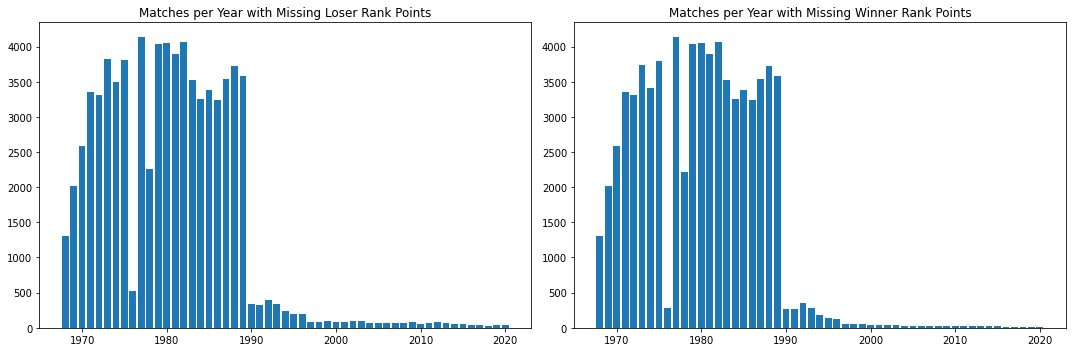

In [95]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
year = Counter(atp_matches[atp_matches["loser_rank_points"].isnull()]["year"])
plt.bar(year.keys(), year.values())
plt.title("Matches per Year with Missing Loser Rank Points")

plt.subplot(1, 2, 2)
year = Counter(atp_matches[atp_matches["winner_rank_points"].isnull()]["year"])
plt.bar(year.keys(), year.values())
plt.title("Matches per Year with Missing Winner Rank Points")

plt.tight_layout()
plt.show()

This is all we'll do here so far as exploring missing values goes. There is an arguement for limiting the data to 1991 and beyond, removing the matches missing match stats, and removing Davis Cup to ensure we have most of the data populated. But for something like Elo ratings, we only need who won and the date of the match. 

**Explore Player Information**

Let's look at some of the player information we have. 

We'll start by looking at player names and IDs to ensure these look reasonable and have a one-to-one mapping. We see that there are a total of 6,422 unique player ID-name pairs. We see very close to a one-to-one mapping from name to ID.  Only one ID is associated with more than one name. This is actually the same name but with the player's country ("Nzl" aka New Zealand) appended. The names with multiple IDs are mostly from before 1985 and appear relatively infrequently. So we should be able to trust the IDs to help us track player identities.



In [104]:
losers = atp_matches[["loser_id","loser_name"]]
losers = losers.rename(columns={"loser_id": "id", "loser_name": "name"})

winners = atp_matches[["winner_id","winner_name"]]
winners = winners.rename(columns={"winner_id": "id", "winner_name": "name"})

players = pd.concat([losers,winners])
players = players.groupby(['id','name']).size().reset_index().rename(columns={0:'count'})
players.shape

(6422, 3)

In [110]:
id_check = players.groupby(['id']).size().reset_index().rename(columns={0:'count'})
print("Number of Player IDs Associated with More than One Name: ",len(id_check[id_check['count']>1]))
print("ID with More than One Name:",int(id_check[id_check['count']>1]["id"]))

players[players["id"]==100474]

Number of Player IDs Associated with More than One Name:  1
ID with More than One Name: 100474


,id,name,count
458,100474,Chris Lewis,394
459,100474,Chris Lewis Nzl,22


Number of Player Names Associated with More than One ID:  28


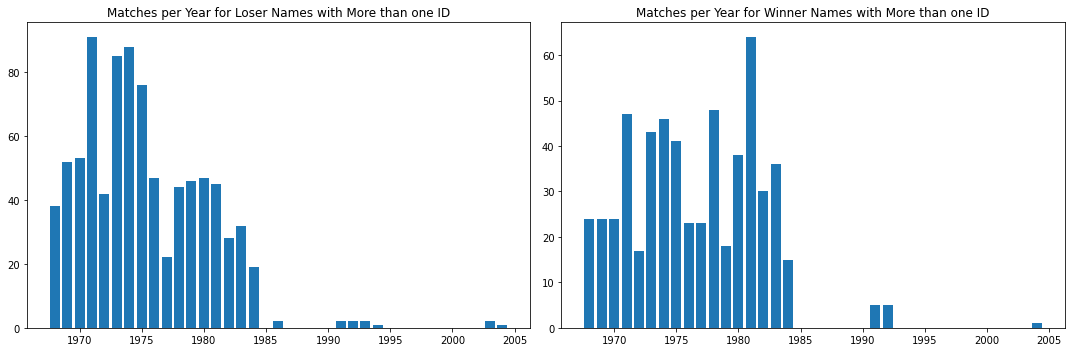

In [142]:
name_check = players.groupby(['name']).size().reset_index().rename(columns={0:'count'})
print("Number of Player Names Associated with More than One ID: ",len(name_check[name_check['count']>1]))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
x = Counter(atp_matches[atp_matches["loser_name"].isin(list(name_check[name_check['count']>1]["name"]))]["year"])
plt.bar(x.keys(), x.values())
plt.title("Matches per Year for Loser Names with More than one ID")

plt.subplot(1, 2, 2)
x = Counter(atp_matches[atp_matches["winner_name"].isin(list(name_check[name_check['count']>1]["name"]))]["year"])
plt.bar(x.keys(), x.values())
plt.title("Matches per Year for Winner Names with More than one ID")

plt.tight_layout()
plt.show()

We have data on player handedness, height, age, and country. As expected, we see many more righties than lefties. There are a few players with unknown handedness.



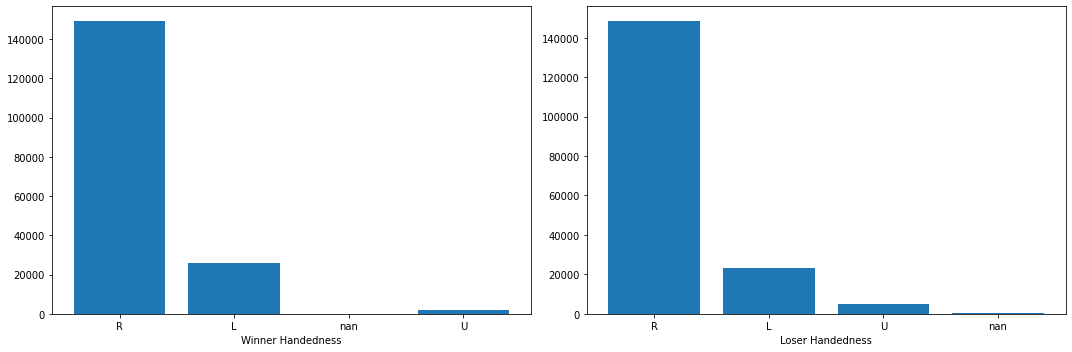

In [151]:
plt.figure(figsize=(15,5))
x = Counter(atp_matches["winner_hand"])
plt.subplot(1, 2, 1)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Winner Handedness")

x = Counter(atp_matches["loser_hand"])
plt.subplot(1, 2, 2)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Loser Handedness")

plt.tight_layout()
plt.show()

Heights and ages are roughly what we expect. Note that the spikes in the curves for heights are a result of heights being measured in discrete fractions of centimeters. Note that ages are also skewed younger. 

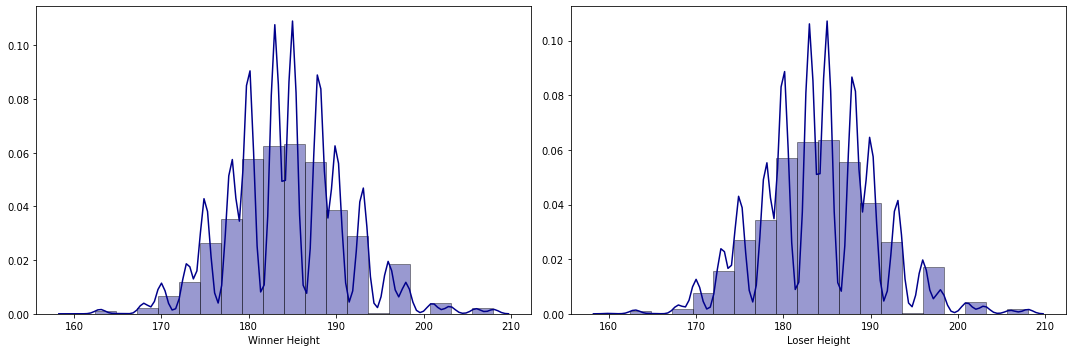

In [156]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(atp_matches["winner_ht"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Height")

plt.subplot(1, 2, 2)
sns.distplot(atp_matches["loser_ht"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Height")

plt.tight_layout()
plt.show()

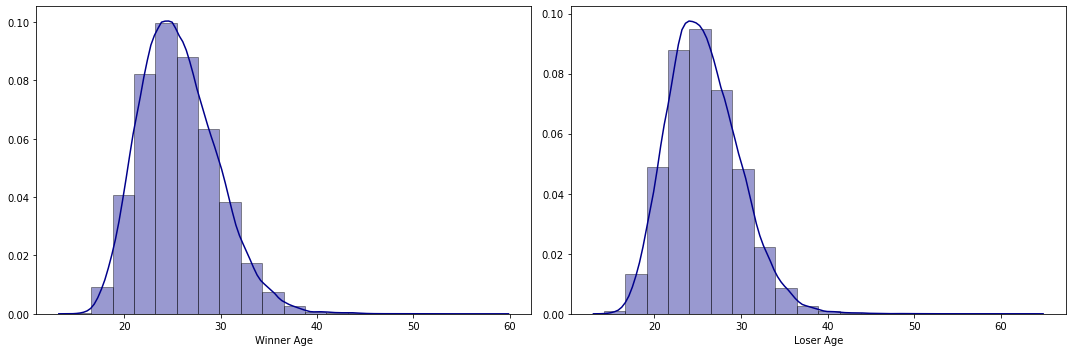

In [158]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(atp_matches["winner_age"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Age")

plt.subplot(1, 2, 2)
sns.distplot(atp_matches["loser_age"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Age")

plt.tight_layout()
plt.show()

Most matches are won and lost by Spanish, Australlian, and American players. Europe in general is also well represented. Note the initial predominance of Americans and Australlians but the recent rise of Spanish players. The field has become more diverse over time in general.

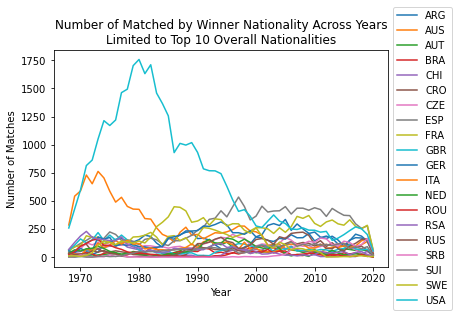

In [175]:
top_countries = atp_matches[atp_matches["winner_ioc"].isin(list(atp_matches.groupby(['winner_ioc']).size().reset_index().rename(columns={0:'count'}).sort_values("count",ascending=False)[0:20]['winner_ioc']))]
pd.crosstab(top_countries["year"],top_countries["winner_ioc"]).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Number of Matched by Winner Nationality Across Years\nLimited to Top 20 Overall Nationalities")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

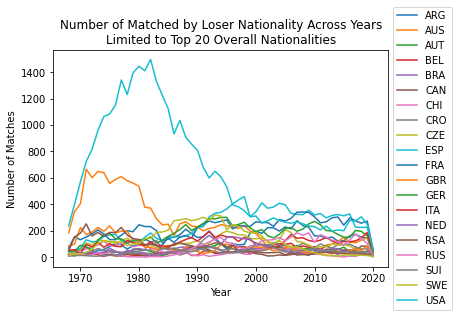

In [176]:
top_countries = atp_matches[atp_matches["loser_ioc"].isin(list(atp_matches.groupby(['loser_ioc']).size().reset_index().rename(columns={0:'count'}).sort_values("count",ascending=False)[0:20]['loser_ioc']))]
pd.crosstab(top_countries["year"],top_countries["loser_ioc"]).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Number of Matched by Loser Nationality Across Years\nLimited to Top 20 Overall Nationalities")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

**Explore Detail Statistics**

Next we'll look at the detailed match statistics, we limit to the matches for which these are populated here. These include numbers of aces, double faults, serve points, first serves made, first-serve points won, second-serve points won, serve games, break points saved, and break points faced. We have these statistics for both the winner and loser of every match.  

We'll discuss all these here and then show the densities. Aces range between zero and ~100. The distributions are heavily skewed toward zero. Winners tend to have more aces, as we might expect. Double faults are also skewed toward zero and max out around 30. Losers tend to have slightly more. In terms of service, both winners and losers look pretty similar. Winners break their opponents more often, face fewer break points, and perform better on their own break points. From these simple density plots alone, we can see that break points appear to be an important metric for determining the winner. Anyone who plays or watches tennis will not be suprised. 

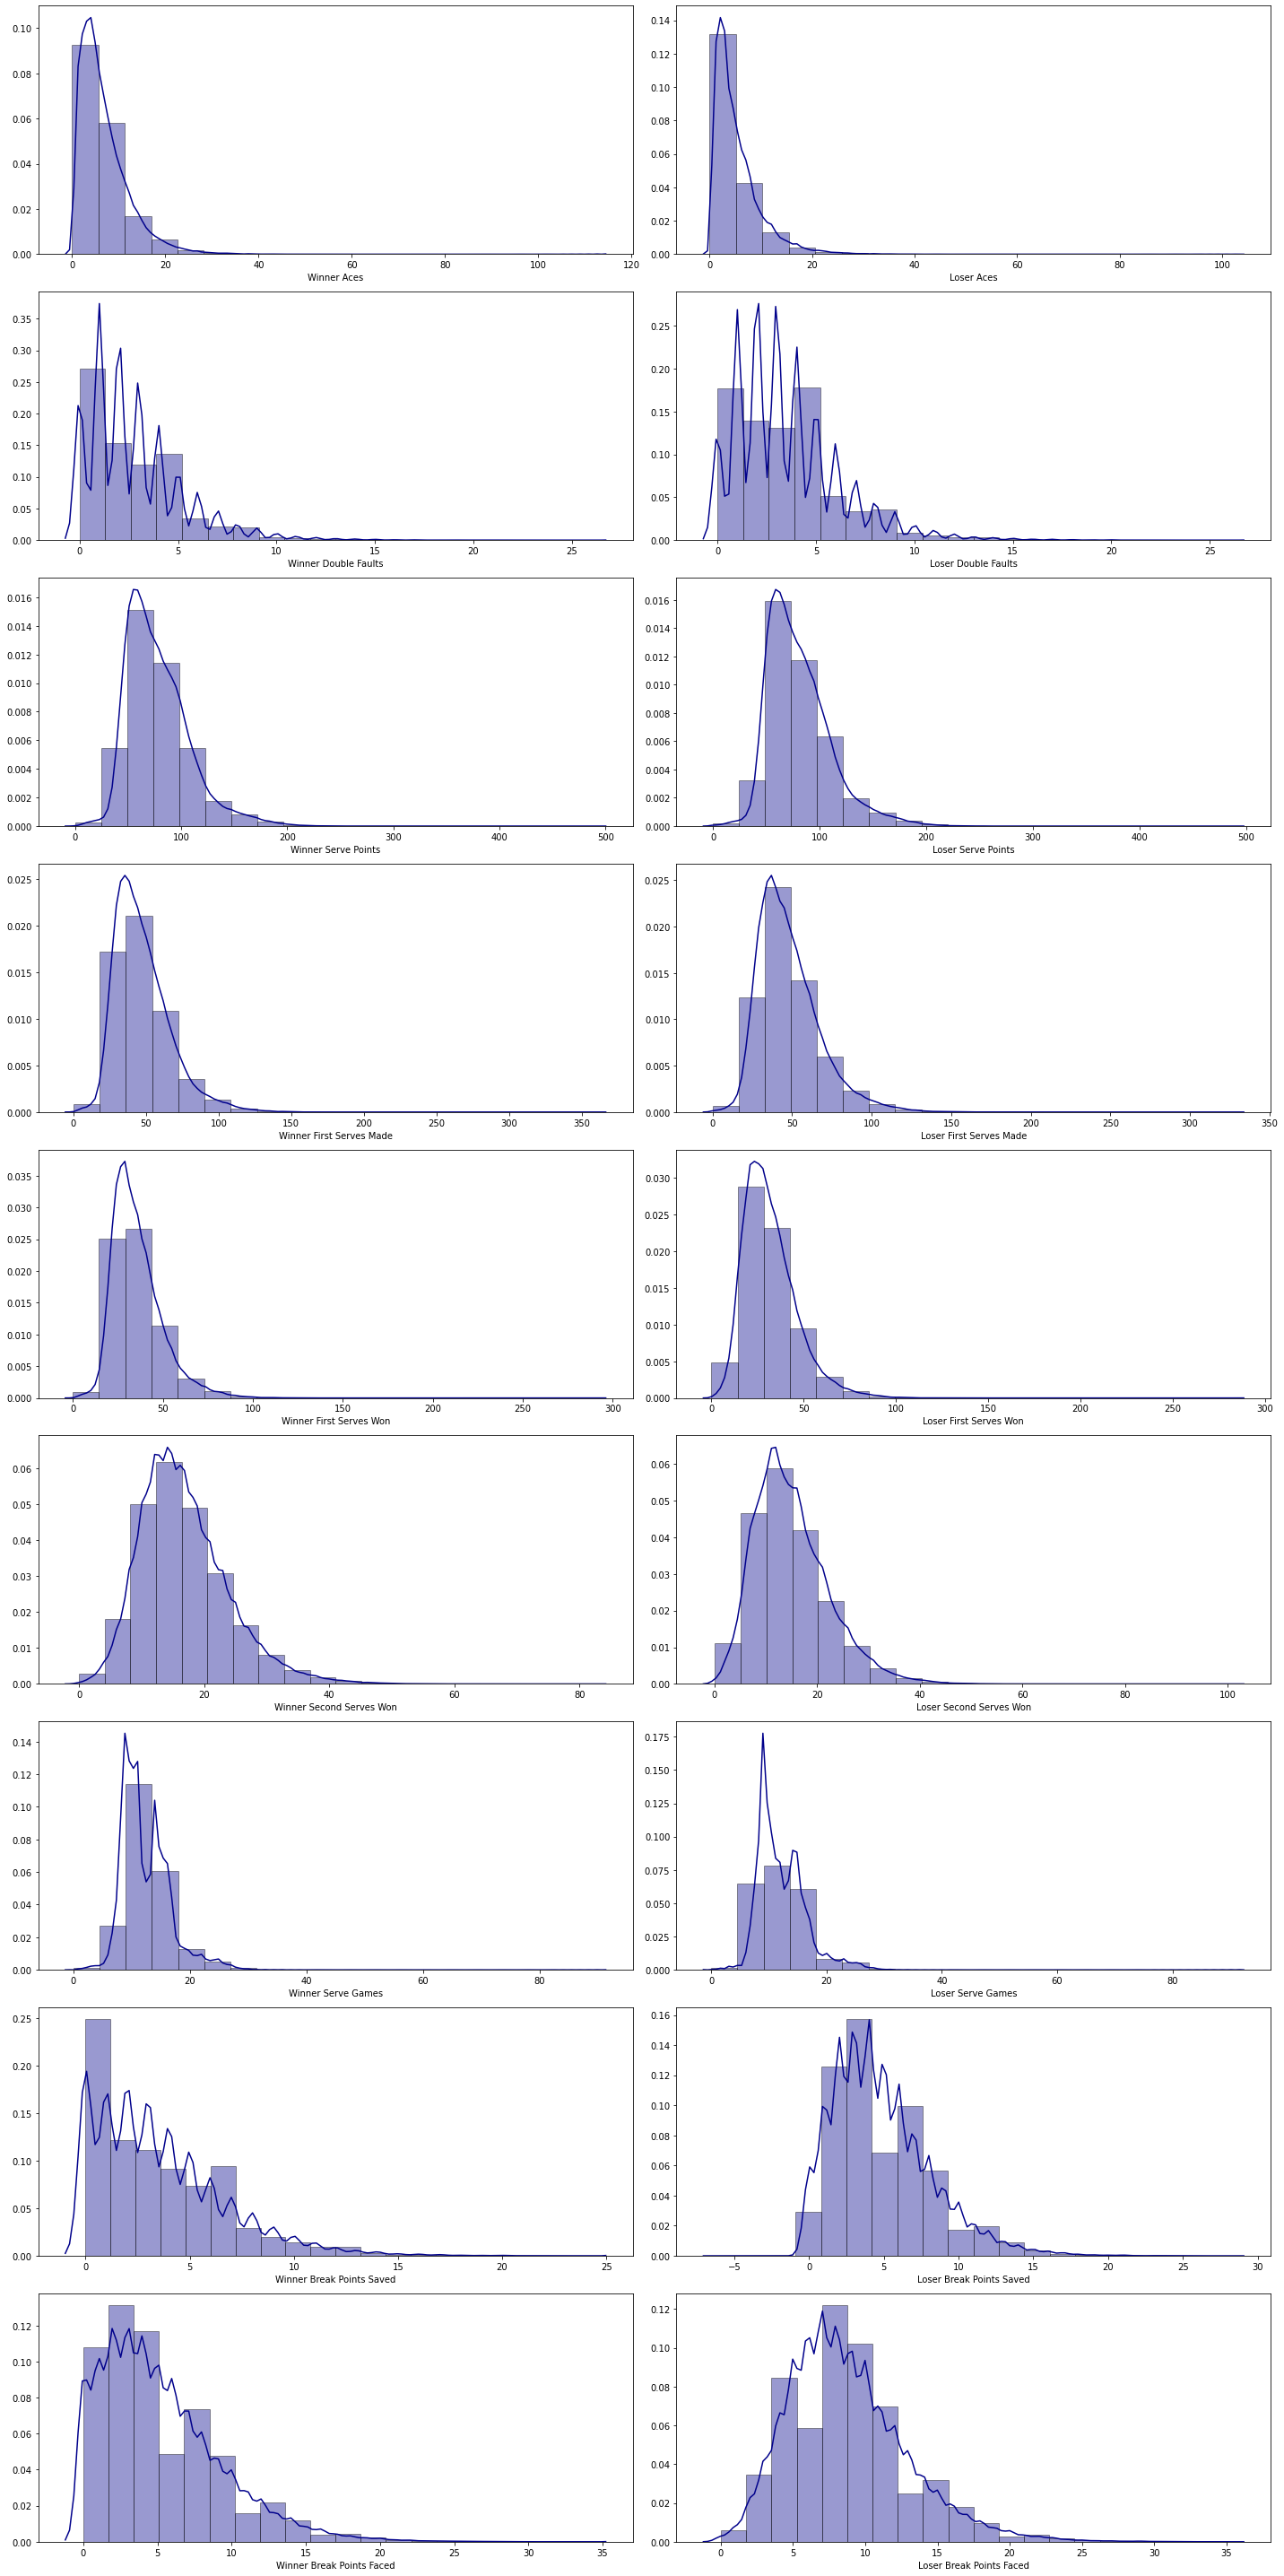

In [177]:
plt.figure(figsize=(20,40))

plt.subplot(9, 2, 1)
sns.distplot(nonmissing_detail_stats["w_ace"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Aces")

plt.subplot(9, 2, 2)
sns.distplot(nonmissing_detail_stats["l_ace"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Aces")

plt.subplot(9, 2, 3)
sns.distplot(nonmissing_detail_stats["w_df"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Double Faults")

plt.subplot(9, 2, 4)
sns.distplot(nonmissing_detail_stats["l_df"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Double Faults")

plt.subplot(9, 2, 5)
sns.distplot(nonmissing_detail_stats["w_svpt"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Serve Points")

plt.subplot(9, 2, 6)
sns.distplot(nonmissing_detail_stats["l_svpt"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Serve Points")

plt.subplot(9, 2, 7)
sns.distplot(nonmissing_detail_stats["w_1stIn"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner First Serves Made")

plt.subplot(9, 2, 8)
sns.distplot(nonmissing_detail_stats["l_1stIn"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser First Serves Made")

plt.subplot(9, 2, 9)
sns.distplot(nonmissing_detail_stats["w_1stWon"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner First Serves Won")

plt.subplot(9, 2, 10)
sns.distplot(nonmissing_detail_stats["l_1stWon"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser First Serves Won")

plt.subplot(9, 2, 11)
sns.distplot(nonmissing_detail_stats["w_2ndWon"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Second Serves Won")

plt.subplot(9, 2, 12)
sns.distplot(nonmissing_detail_stats["l_2ndWon"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Second Serves Won")

plt.subplot(9, 2, 13)
sns.distplot(nonmissing_detail_stats["w_SvGms"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Serve Games")

plt.subplot(9, 2, 14)
sns.distplot(nonmissing_detail_stats["l_SvGms"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Serve Games")

plt.subplot(9, 2, 15)
sns.distplot(nonmissing_detail_stats["w_bpSaved"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Break Points Saved")

plt.subplot(9, 2, 16)
sns.distplot(nonmissing_detail_stats["l_bpSaved"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Break Points Saved")

plt.subplot(9, 2, 17)
sns.distplot(nonmissing_detail_stats["w_bpFaced"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Break Points Faced")

plt.subplot(9, 2, 18)
sns.distplot(nonmissing_detail_stats["l_bpFaced"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Break Points Faced")

plt.tight_layout()
plt.show()

**Explore Score, Minutes, and Ranks**

Let's turn to exploring the score, minute, and rank information. 

To explore the score in games, we'll break it down by set and winner vs loser. We ignore tie break scores for now. But the winner of the tie break is reflected in the score in games. We see roughly the expected results. That is, most matches are played as best of 3 sets. Some are played as best of 5. We also see a small number of blank or non-sensical values. 


In [178]:
set_scores = atp_matches["score"].str.split(" ", expand = True) 

def get_set_scores(set_num):
  set_1 = set_scores[set_num-1]
  set_1 = set_1.str.split("-", expand = True) 
  set_1b = set_1[1].str.split("(", expand = True) 
  set1_winner = set_1[0]
  set1_loser = set_1b[0]
  set_1 = pd.concat([set1_winner, set1_loser], axis=1)
  set_1.columns=["winner_set_"+str(set_num)+"_score","loser_set_"+str(set_num)+"_score"]
  return set_1

set_1 = get_set_scores(1)
set_2 = get_set_scores(2)
set_3 = get_set_scores(3)
set_4 = get_set_scores(4)
set_5 = get_set_scores(5)

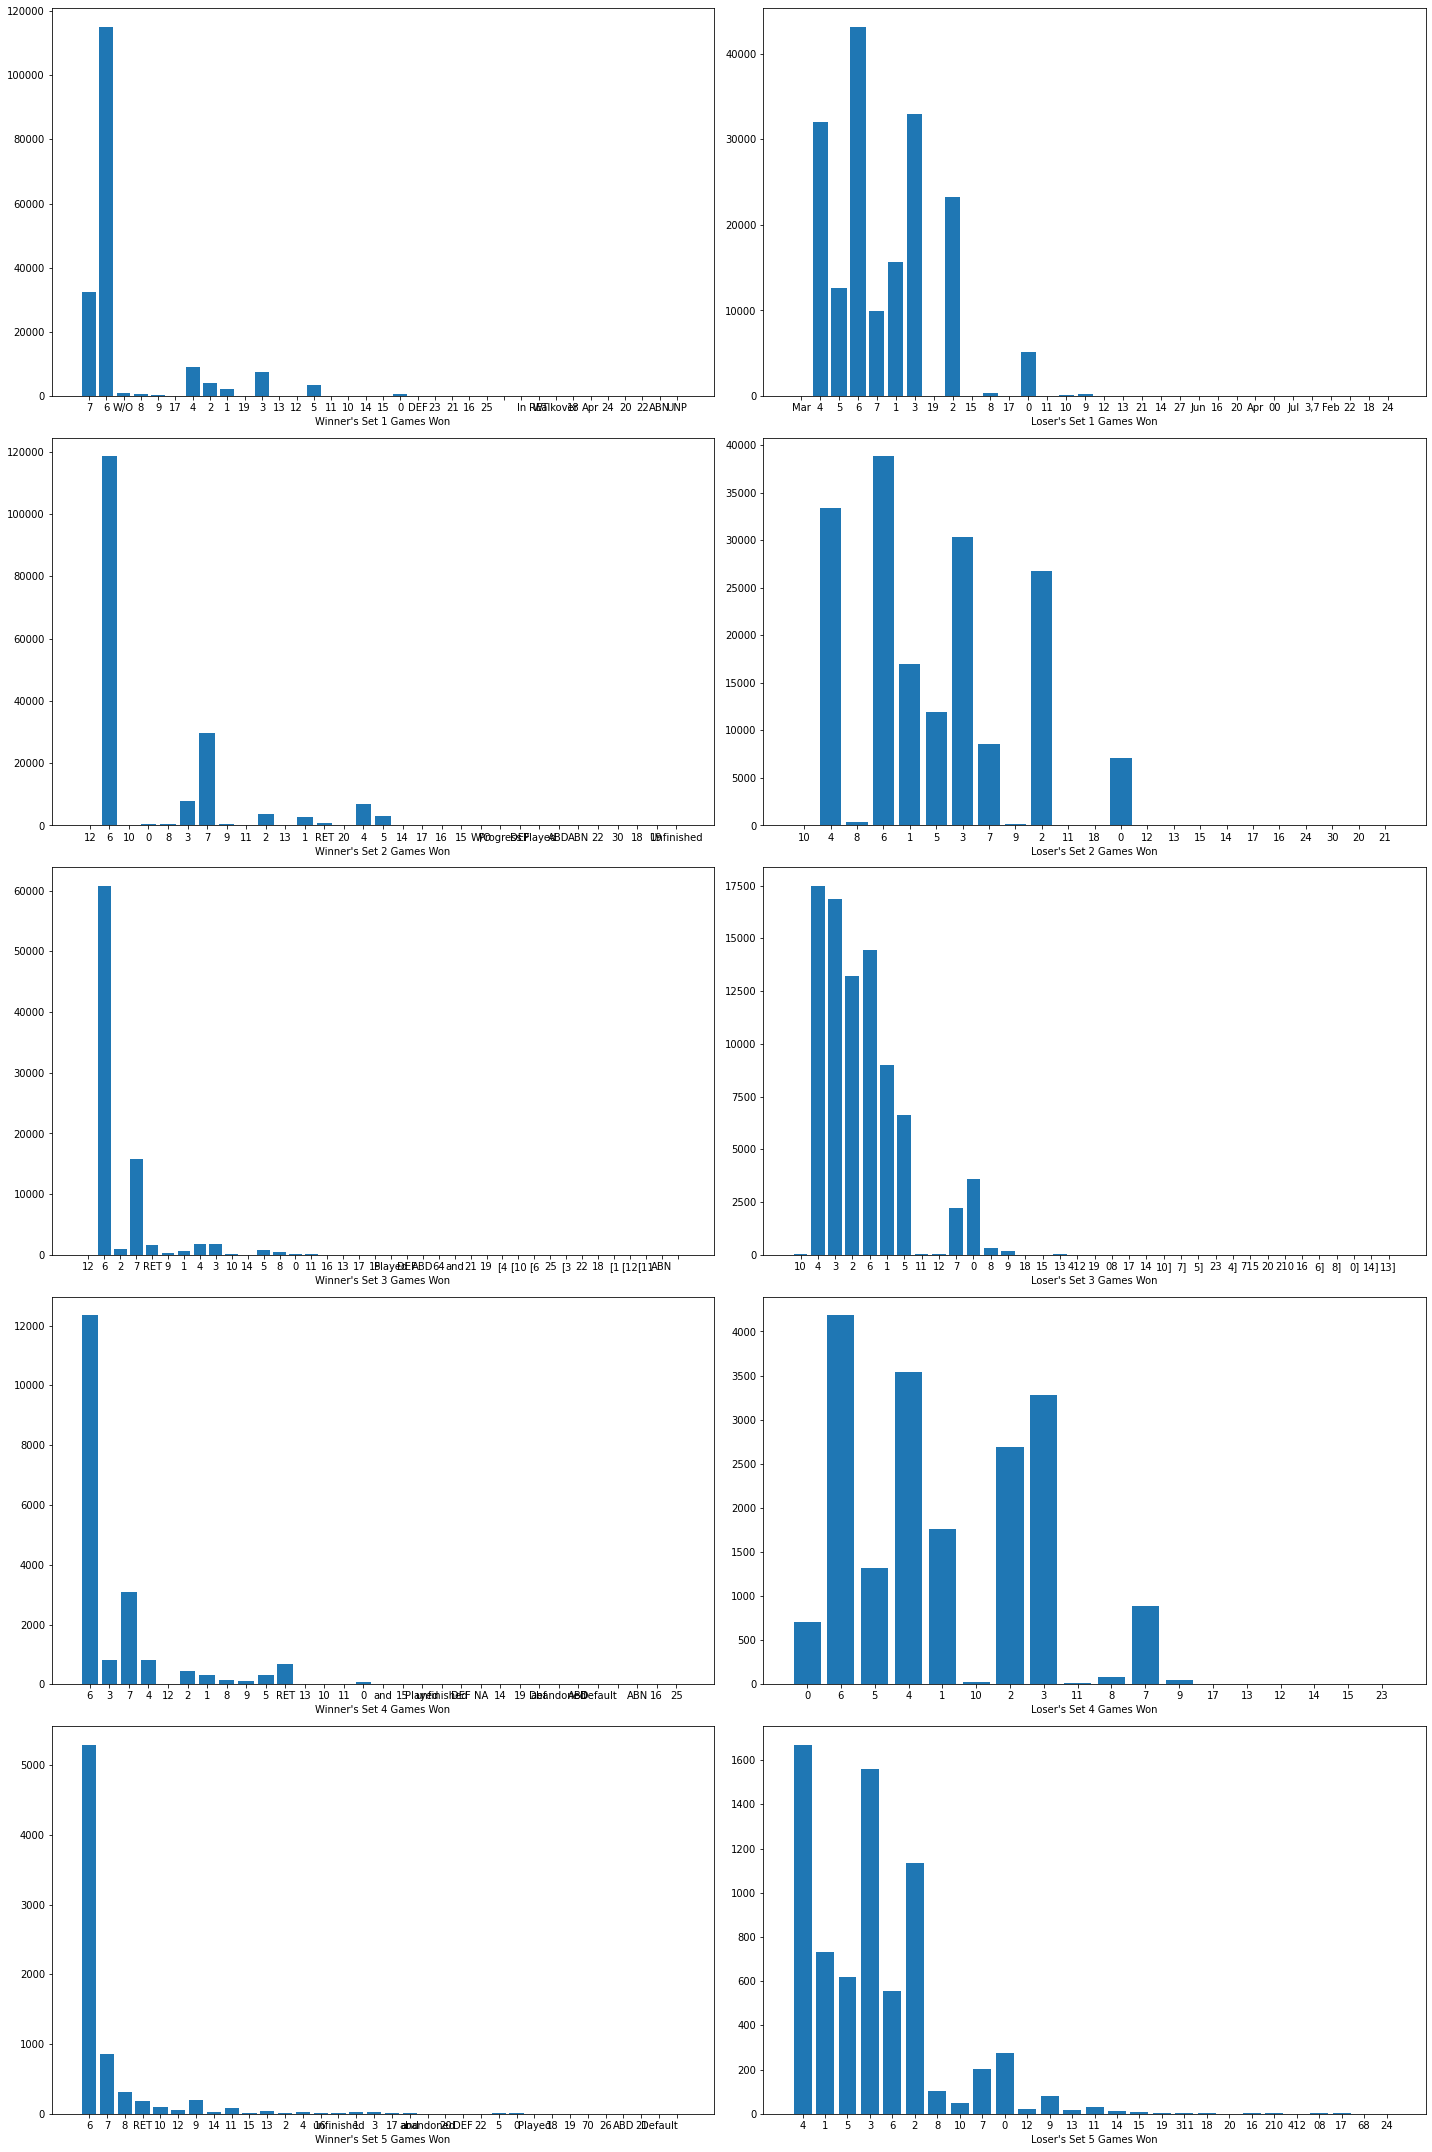

In [179]:
plt.figure(figsize=(20,30))

x = Counter(set_1["winner_set_1_score"][set_1["winner_set_1_score"].notnull()])
plt.subplot(5, 2, 1)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Winner's Set 1 Games Won")

x = Counter(set_1["loser_set_1_score"][set_1["loser_set_1_score"].notnull()])
plt.subplot(5, 2, 2)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Loser's Set 1 Games Won")

x = Counter(set_2["winner_set_2_score"][set_2["winner_set_2_score"].notnull()])
plt.subplot(5, 2, 3)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Winner's Set 2 Games Won")

x = Counter(set_2["loser_set_2_score"][set_2["loser_set_2_score"].notnull()])
plt.subplot(5, 2, 4)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Loser's Set 2 Games Won")

x = Counter(set_3["winner_set_3_score"][set_3["winner_set_3_score"].notnull()])
plt.subplot(5, 2, 5)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Winner's Set 3 Games Won")

x = Counter(set_3["loser_set_3_score"][set_3["loser_set_3_score"].notnull()])
plt.subplot(5, 2, 6)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Loser's Set 3 Games Won")

x = Counter(set_4["winner_set_4_score"][set_4["winner_set_4_score"].notnull()])
plt.subplot(5, 2, 7)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Winner's Set 4 Games Won")

x = Counter(set_4["loser_set_4_score"][set_4["loser_set_4_score"].notnull()])
plt.subplot(5, 2, 8)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Loser's Set 4 Games Won")

x = Counter(set_5["winner_set_5_score"][set_5["winner_set_5_score"].notnull()])
plt.subplot(5, 2, 9)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Winner's Set 5 Games Won")

x = Counter(set_5["loser_set_5_score"][set_5["loser_set_5_score"].notnull()])
plt.subplot(5, 2, 10)
plt.bar([str(i) for i in x.keys()], x.values())
plt.xlabel("Loser's Set 5 Games Won")

plt.tight_layout()
plt.show()

Looking at `minutes` we see that most matches are less than 3 hours and that there is a pretty long tail.

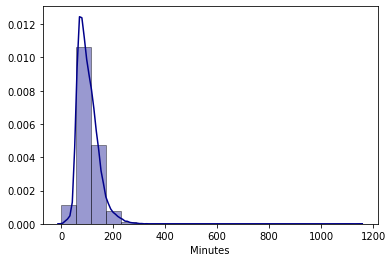

In [180]:
sns.distplot(atp_matches["minutes"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Minutes")
plt.show()

There isnt much suprising about the ranks or rank points. Though, as we saw above there are some missing values. 

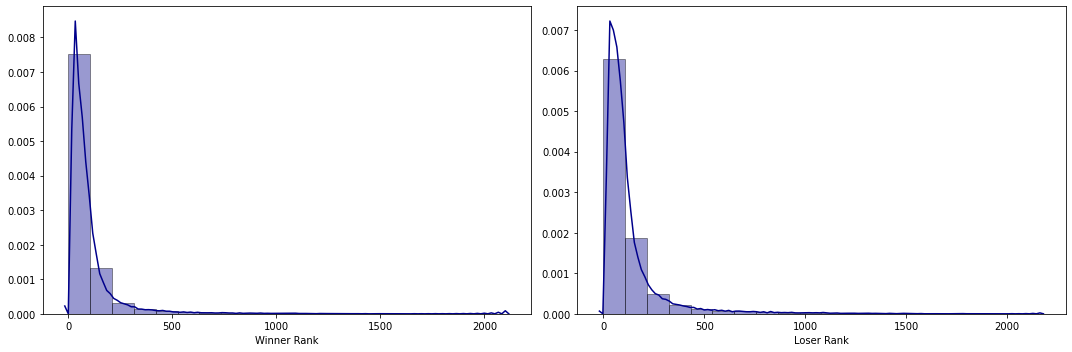

In [181]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(atp_matches["winner_rank"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Rank")

plt.subplot(1, 2, 2)
sns.distplot(atp_matches["loser_rank"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Rank")

plt.tight_layout()
plt.show()

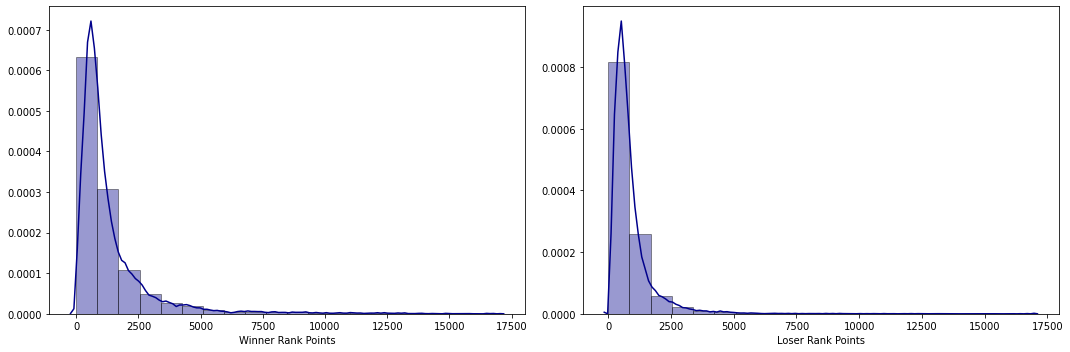

In [182]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(atp_matches["winner_rank_points"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Winner Rank Points")

plt.subplot(1, 2, 2)
sns.distplot(atp_matches["loser_rank_points"], hist=True, kde=True, 
             bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'})
plt.xlabel("Loser Rank Points")

plt.tight_layout()
plt.show()

We've seen a lot of interesting things and now have a much better sense of the data ATP match data. Next I'll clean the data, do some feature engineering, and then we'll dive into some analyses.  